In [282]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import EarlyStopping

from sklearn.metrics import classification_report

Reading Data

In [236]:
train_df = pd.read_csv('train.csv')
train_df

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,794,1,0.5,1,0,1,2,0.8,106,6,...,1222,1890,668,13,4,19,1,1,0,0
1996,1965,1,2.6,1,0,0,39,0.2,187,4,...,915,1965,2032,11,10,16,1,1,1,2
1997,1911,0,0.9,1,1,1,36,0.7,108,8,...,868,1632,3057,9,1,5,1,1,0,3
1998,1512,0,0.9,0,4,1,46,0.1,145,5,...,336,670,869,18,10,19,1,1,1,0


In [237]:
test_df = pd.read_csv("test.csv")
test_df

,id,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,...,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,1,1043,1,1.8,1,14,0,5,0.1,193,...,16,226,1412,3476,12,7,2,0,1,0
1,2,841,1,0.5,1,4,1,61,0.8,191,...,12,746,857,3895,6,0,7,1,0,0
2,3,1807,1,2.8,0,1,0,27,0.9,186,...,4,1270,1366,2396,17,10,10,0,1,1
3,4,1546,0,0.5,1,18,1,25,0.5,96,...,20,295,1752,3893,10,0,7,1,1,0
4,5,1434,0,1.4,0,11,1,49,0.5,108,...,18,749,810,1773,15,8,7,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,996,1700,1,1.9,0,0,1,54,0.5,170,...,17,644,913,2121,14,8,15,1,1,0
996,997,609,0,1.8,1,0,0,13,0.9,186,...,2,1152,1632,1933,8,1,19,0,1,1
997,998,1185,0,1.4,0,1,1,8,0.5,80,...,12,477,825,1223,5,0,14,1,0,0
998,999,1533,1,0.5,1,0,0,50,0.4,171,...,12,38,832,2509,15,11,6,0,1,0


In [239]:
data = pd.concat([train_df,test_df])
data

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range,id
0,842,0,2.2,0,1,0,7,0.6,188,2,...,756,2549,9,7,19,0,0,1,1.0,NaN
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,1988,2631,17,3,7,1,1,0,2.0,NaN
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1716,2603,11,2,9,1,1,0,2.0,NaN
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1786,2769,16,8,11,1,0,0,2.0,NaN
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1212,1411,8,2,15,1,1,0,1.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,1700,1,1.9,0,0,1,54,0.5,170,7,...,913,2121,14,8,15,1,1,0,NaN,996.0
996,609,0,1.8,1,0,0,13,0.9,186,4,...,1632,1933,8,1,19,0,1,1,NaN,997.0
997,1185,0,1.4,0,1,1,8,0.5,80,1,...,825,1223,5,0,14,1,0,0,NaN,998.0
998,1533,1,0.5,1,0,0,50,0.4,171,2,...,832,2509,15,11,6,0,1,0,NaN,999.0


In [240]:
data =data.drop(columns="id",axis=1,inplace=False)

In [241]:
data.columns

Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi', 'price_range'],
      dtype='object')

In [242]:
data.describe()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,...,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,2000.000000
mean,1241.849000,0.502000,1.528467,0.512000,4.404000,0.510000,32.581667,0.507000,140.003000,4.456333,...,639.112333,1247.601667,2129.141333,12.202667,5.616667,11.035667,0.759667,0.502000,0.507000,1.500000
std,437.063804,0.500079,0.820358,0.499939,4.383742,0.499983,18.152810,0.285969,35.213809,2.289361,...,440.202998,434.666168,1085.694231,4.251151,4.322494,5.474400,0.427357,0.500079,0.500034,1.118314
min,500.000000,0.000000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,...,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,863.750000,0.000000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,2.000000,...,277.750000,865.000000,1212.750000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.750000
50%,1232.000000,1.000000,1.500000,1.000000,3.000000,1.000000,33.000000,0.500000,140.000000,4.000000,...,564.000000,1248.000000,2147.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.500000
75%,1619.000000,1.000000,2.300000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,6.000000,...,932.500000,1634.000000,3065.250000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.250000
max,1999.000000,1.000000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,...,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


In [243]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  3000 non-null   int64  
 1   blue           3000 non-null   int64  
 2   clock_speed    3000 non-null   float64
 3   dual_sim       3000 non-null   int64  
 4   fc             3000 non-null   int64  
 5   four_g         3000 non-null   int64  
 6   int_memory     3000 non-null   int64  
 7   m_dep          3000 non-null   float64
 8   mobile_wt      3000 non-null   int64  
 9   n_cores        3000 non-null   int64  
 10  pc             3000 non-null   int64  
 11  px_height      3000 non-null   int64  
 12  px_width       3000 non-null   int64  
 13  ram            3000 non-null   int64  
 14  sc_h           3000 non-null   int64  
 15  sc_w           3000 non-null   int64  
 16  talk_time      3000 non-null   int64  
 17  three_g        3000 non-null   int64  
 18  touch_screen  

Data visualiztion

In [244]:
data['price_range'].value_counts()

price_range
1.0    500
2.0    500
3.0    500
0.0    500
Name: count, dtype: int64

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_19984\2463485152.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=quality_counts.index, y=quality_counts.values, palette=["blue", "red", "pink"])
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_19984\2463485152.py:5: UserWarning: 
The palette list has fewer values (3) than needed (4) and will cycle, which may produce an uninterpretable plot.
  ax = sns.barplot(x=quality_counts.index, y=quality_counts.values, palette=["blue", "red", "pink"])


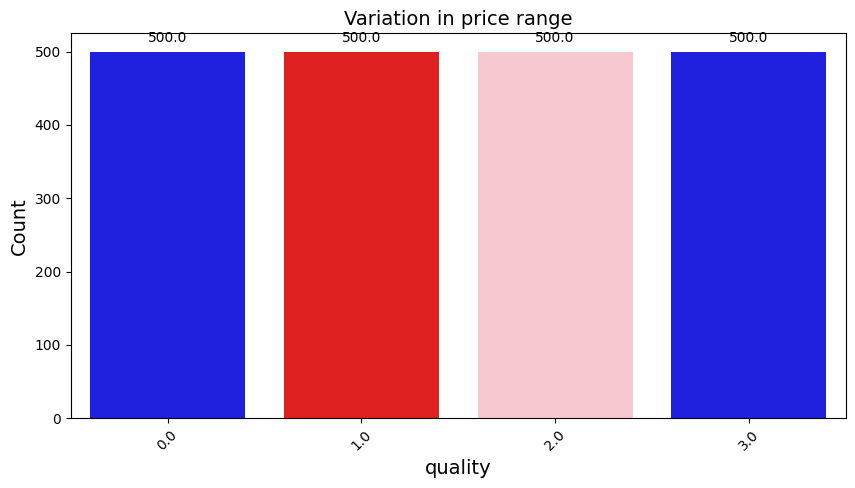

In [245]:
quality_counts = data["price_range"].value_counts()

# Create the bar plot
plt.figure(figsize=(10, 5))
ax = sns.barplot(x=quality_counts.index, y=quality_counts.values, palette=["blue", "red", "pink"])

# Add labels to the bars
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', xytext=(0, 10), 
                textcoords='offset points')

plt.title("Variation in price range", fontsize=14)
plt.xlabel("quality", fontsize=14)
plt.ylabel("Count", fontsize=14)
plt.xticks(rotation=45)
plt.show()

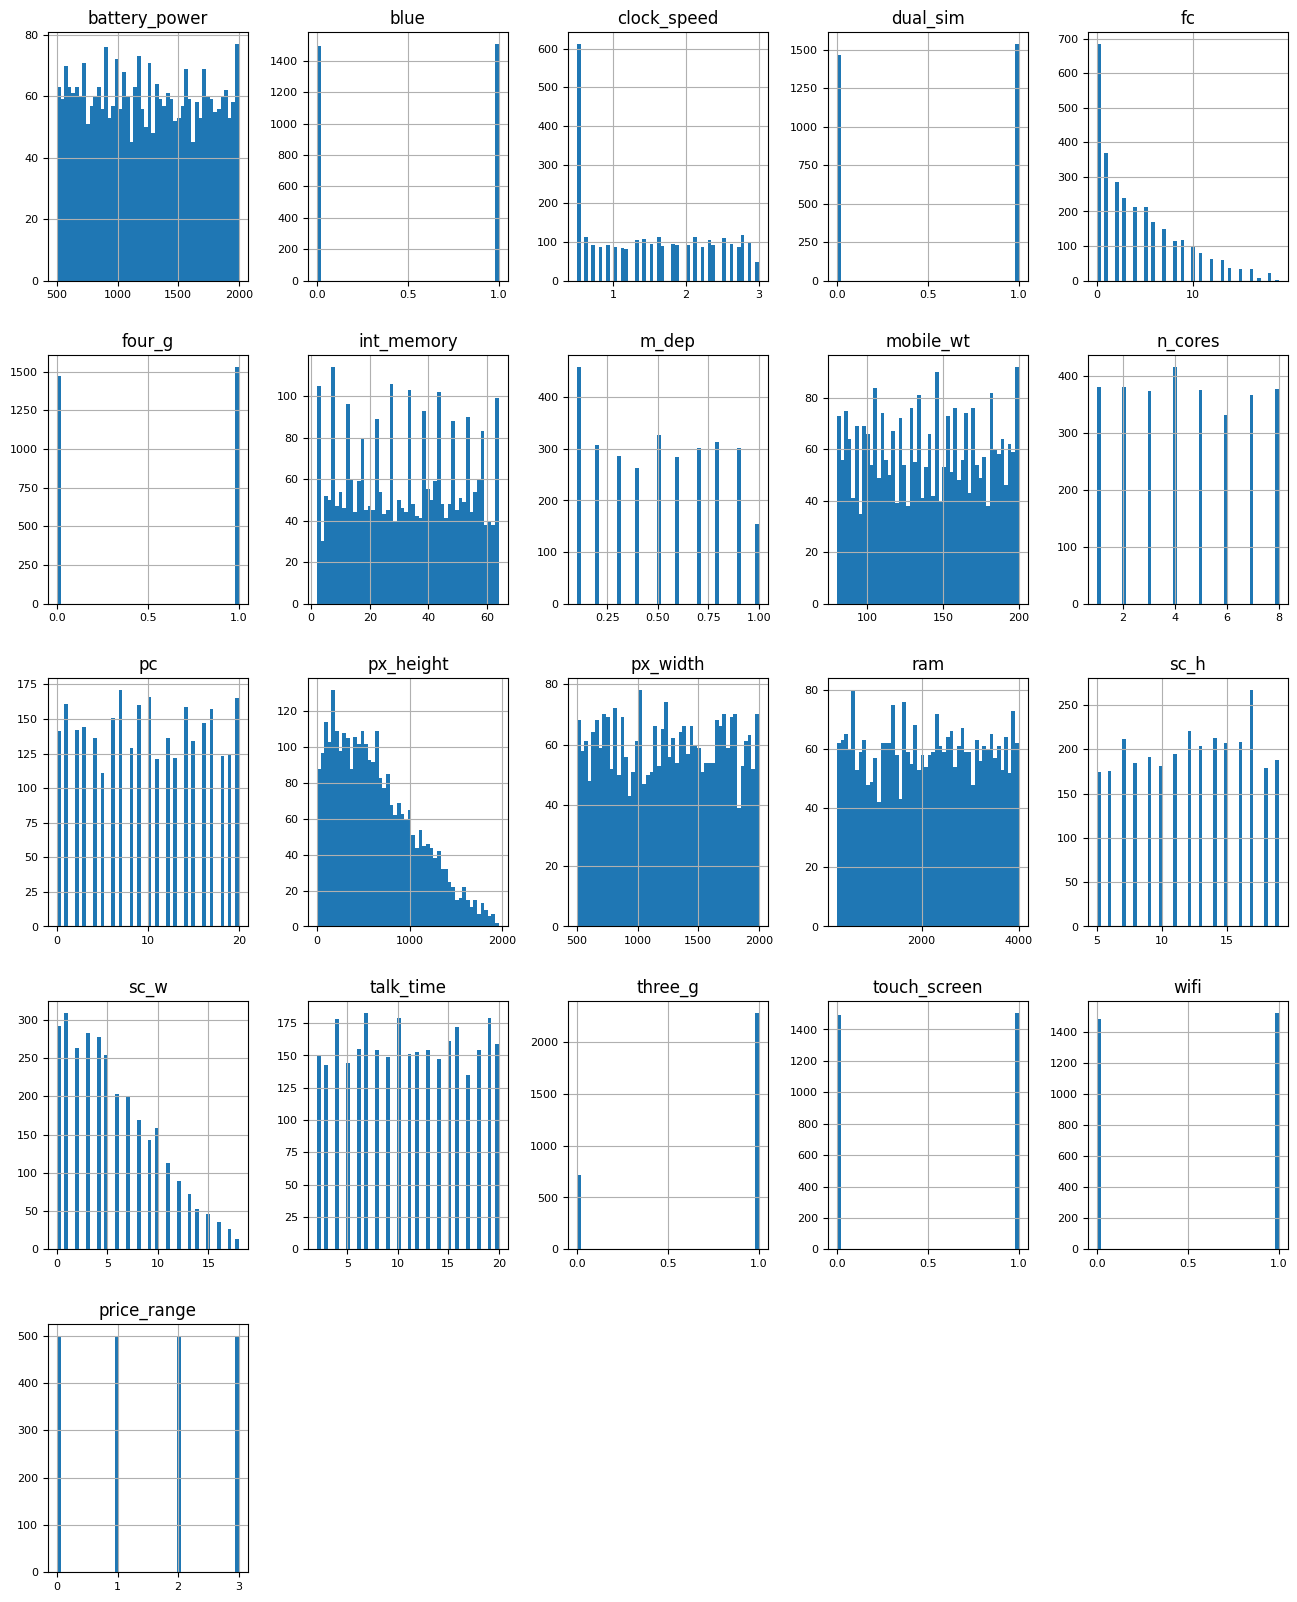

In [246]:
data.hist(figsize=(16, 20), bins=50, xlabelsize=8, ylabelsize=8);

Feature engineering

In [247]:
data["battery_power"].value_counts()

battery_power
1715    9
1807    8
560     7
1589    6
1278    6
       ..
606     1
1099    1
551     1
1633    1
1797    1
Name: count, Length: 1275, dtype: int64

In [248]:
# Using a list comprehension to categorize battery_power
data["battery_power"] = [
    1 if 500 <= index < 1000 else 2 if 1000 <= index <= 1500 else 3 
    for index in data["battery_power"]
]
# While 1 mean not good 2 good 3 great 
data["battery_power"].value_counts()

battery_power
1    1029
2     987
3     984
Name: count, dtype: int64

In [249]:
data["blue"].value_counts()

blue
1    1506
0    1494
Name: count, dtype: int64

In [250]:
data["clock_speed"].value_counts()

clock_speed
0.5    612
2.8    118
0.6    114
2.1    113
1.6    113
2.5    110
1.4    109
1.3    106
2.3    106
2.9    100
2.6     95
1.5     94
1.8     94
1.9     93
2.0     92
0.7     92
0.9     92
2.4     91
1.7     90
2.7     88
2.2     88
1.0     87
0.8     87
1.1     84
1.2     83
3.0     49
Name: count, dtype: int64

In [252]:
# Using a list comprehension to categorize clock_speed
data["clock_speed"] = [
    1 if 0.5 <= index < 1 else 2 if 1 <= index <= 1.5 else 3 if 1.5 <= index <2 else 4 if 2 <= index <2.5 else 5
    for index in data["clock_speed"]
]
# While 1 mean not good 2 ok 3 good 4 great 5 damnnn 
data["clock_speed"].value_counts()

clock_speed
5    1440
2     997
4     563
Name: count, dtype: int64

In [253]:
data["fc"].value_counts()

fc
0     684
1     369
2     286
3     240
4     213
5     213
6     171
7     150
9     119
8     115
10     99
11     80
12     62
13     61
14     36
16     35
15     35
18     21
17      8
19      3
Name: count, dtype: int64

In [254]:
data["four_g"].value_counts()

four_g
1    1530
0    1470
Name: count, dtype: int64

In [255]:
data["mobile_wt"].value_counts()

mobile_wt
101    37
83     36
105    35
185    35
198    34
       ..
126    16
140    16
176    14
120    13
96     12
Name: count, Length: 121, dtype: int64

In [256]:
# Using a list comprehension to categorize mobile_wt
data["mobile_wt"] = [
    1 if 80 <= index < 120 else 2 if 120 <= index < 160 else 3  
    for index in data["mobile_wt"]
]
# While 1 mean not good 2 ok 3  great 
data["mobile_wt"].value_counts()

mobile_wt
3    1018
1    1008
2     974
Name: count, dtype: int64

In [257]:
data

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,1,0,5,0,1,0,7,0.6,3,2,...,20,756,2549,9,7,19,0,0,1,1.0
1,2,1,2,1,0,1,53,0.7,2,3,...,905,1988,2631,17,3,7,1,1,0,2.0
2,1,1,2,1,2,1,41,0.9,2,5,...,1263,1716,2603,11,2,9,1,1,0,2.0
3,1,1,5,0,0,0,10,0.8,2,6,...,1216,1786,2769,16,8,11,1,0,0,2.0
4,3,1,4,0,13,1,44,0.6,2,2,...,1208,1212,1411,8,2,15,1,1,0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,1,5,0,0,1,54,0.5,3,7,...,644,913,2121,14,8,15,1,1,0,NaN
996,1,0,5,1,0,0,13,0.9,3,4,...,1152,1632,1933,8,1,19,0,1,1,NaN
997,2,0,4,0,1,1,8,0.5,1,1,...,477,825,1223,5,0,14,1,0,0,NaN
998,3,1,2,1,0,0,50,0.4,3,2,...,38,832,2509,15,11,6,0,1,0,NaN


In [258]:
data["int_memory"].value_counts()

int_memory
44    61
27    60
33    60
14    60
57    60
      ..
60    38
62    38
18    37
4     30
59    29
Name: count, Length: 63, dtype: int64

In [259]:
# Using a list comprehension to categorize int_memory
data["int_memory"] = [
    1 if 0 <= index < 16 else 2 if 16 <= index < 32 else 3 if 32 <= index < 50 else 4
    for index in data["int_memory"]
]
# While 1 mean not good 2 ok 3  great 4 damn 
data["int_memory"].value_counts()

int_memory
3    862
2    749
1    698
4    691
Name: count, dtype: int64

In [260]:
data

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,1,0,5,0,1,0,1,0.6,3,2,...,20,756,2549,9,7,19,0,0,1,1.0
1,2,1,2,1,0,1,4,0.7,2,3,...,905,1988,2631,17,3,7,1,1,0,2.0
2,1,1,2,1,2,1,3,0.9,2,5,...,1263,1716,2603,11,2,9,1,1,0,2.0
3,1,1,5,0,0,0,1,0.8,2,6,...,1216,1786,2769,16,8,11,1,0,0,2.0
4,3,1,4,0,13,1,3,0.6,2,2,...,1208,1212,1411,8,2,15,1,1,0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,1,5,0,0,1,4,0.5,3,7,...,644,913,2121,14,8,15,1,1,0,NaN
996,1,0,5,1,0,0,1,0.9,3,4,...,1152,1632,1933,8,1,19,0,1,1,NaN
997,2,0,4,0,1,1,1,0.5,1,1,...,477,825,1223,5,0,14,1,0,0,NaN
998,3,1,2,1,0,0,4,0.4,3,2,...,38,832,2509,15,11,6,0,1,0,NaN


In [261]:
data["px_height"].value_counts()

px_height
371     9
98      9
35      8
346     7
667     7
       ..
340     1
1353    1
1301    1
1878    1
1409    1
Name: count, Length: 1333, dtype: int64

In [262]:
data["px_width"].value_counts()

px_width
1247    8
1552    8
874     7
1393    7
1670    7
       ..
798     1
1756    1
771     1
1954    1
913     1
Name: count, Length: 1313, dtype: int64

In [263]:
data["ram"].value_counts()

ram
3142    5
2819    5
2610    5
305     4
2940    4
       ..
912     1
724     1
1368    1
3162    1
1933    1
Name: count, Length: 2070, dtype: int64

In [211]:
data["price_range"].isna().value_counts()

price_range
False    2000
Name: count, dtype: int64

In [264]:
data

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,1,0,5,0,1,0,1,0.6,3,2,...,20,756,2549,9,7,19,0,0,1,1.0
1,2,1,2,1,0,1,4,0.7,2,3,...,905,1988,2631,17,3,7,1,1,0,2.0
2,1,1,2,1,2,1,3,0.9,2,5,...,1263,1716,2603,11,2,9,1,1,0,2.0
3,1,1,5,0,0,0,1,0.8,2,6,...,1216,1786,2769,16,8,11,1,0,0,2.0
4,3,1,4,0,13,1,3,0.6,2,2,...,1208,1212,1411,8,2,15,1,1,0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,1,5,0,0,1,4,0.5,3,7,...,644,913,2121,14,8,15,1,1,0,NaN
996,1,0,5,1,0,0,1,0.9,3,4,...,1152,1632,1933,8,1,19,0,1,1,NaN
997,2,0,4,0,1,1,1,0.5,1,1,...,477,825,1223,5,0,14,1,0,0,NaN
998,3,1,2,1,0,0,4,0.4,3,2,...,38,832,2509,15,11,6,0,1,0,NaN


In [265]:
columns_to_normalize = ['px_height', 'px_width', 'ram']  # Replace with your actual column names
data_to_normalize = data[columns_to_normalize]

# Convert the selected data to a NumPy array
data_to_normalize_np = data_to_normalize.to_numpy()

# Create a Normalization layer and adapt it to the data
normalizer = tf.keras.layers.Normalization(axis=-1)
normalizer.adapt(data_to_normalize_np)

# Normalize the data
normalized_data = normalizer(data_to_normalize_np)

# Convert back to a DataFrame if needed
normalized_df = pd.DataFrame(normalized_data.numpy(), columns=columns_to_normalize)

# Replace original columns with normalized columns
data[columns_to_normalize] = normalized_df

data.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,1,0,5,0,1,0,1,0.6,3,2,...,-1.406659,-1.131175,0.386784,9,7,19,0,0,1,1.0
1,2,1,2,1,0,1,4,0.7,2,3,...,0.604112,1.703656,0.462324,17,3,7,1,1,0,2.0
2,1,1,2,1,2,1,3,0.9,2,5,...,1.417509,1.077784,0.436530,11,2,9,1,1,0,2.0
3,1,1,5,0,0,0,1,0.8,2,6,...,1.310722,1.238854,0.589453,16,8,11,1,0,0,2.0
4,3,1,4,0,13,1,3,0.6,2,2,...,1.292546,-0.081919,-0.661569,8,2,15,1,1,0,1.0


Training the model

In [266]:
# Select the first 2000 rows from the data for training and testing
selected_data = data.iloc[:2000]
selected_data

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,1,0,5,0,1,0,1,0.6,3,2,...,-1.406659,-1.131175,0.386784,9,7,19,0,0,1,1.0
1,2,1,2,1,0,1,4,0.7,2,3,...,0.604112,1.703656,0.462324,17,3,7,1,1,0,2.0
2,1,1,2,1,2,1,3,0.9,2,5,...,1.417509,1.077784,0.436530,11,2,9,1,1,0,2.0
3,1,1,5,0,0,0,1,0.8,2,6,...,1.310722,1.238854,0.589453,16,8,11,1,0,0,2.0
4,3,1,4,0,13,1,3,0.6,2,2,...,1.292546,-0.081919,-0.661569,8,2,15,1,1,0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,1,1,2,1,0,1,1,0.8,1,6,...,1.324355,1.478158,-1.346037,13,4,19,1,1,0,0.0
1996,3,1,5,1,0,0,3,0.2,3,4,...,0.626833,1.650733,-0.089489,11,10,16,1,1,1,2.0
1997,3,0,2,1,1,1,3,0.7,1,8,...,0.520046,0.884500,0.854765,9,1,5,1,1,0,3.0
1998,3,0,2,0,4,1,3,0.1,2,5,...,-0.688689,-1.329061,-1.160872,18,10,19,1,1,1,0.0


In [267]:
x = selected_data.drop(columns="price_range",axis=1,inplace=False)
y = selected_data["price_range"]

In [269]:
x

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,1,0,5,0,1,0,1,0.6,3,2,2,-1.406659,-1.131175,0.386784,9,7,19,0,0,1
1,2,1,2,1,0,1,4,0.7,2,3,6,0.604112,1.703656,0.462324,17,3,7,1,1,0
2,1,1,2,1,2,1,3,0.9,2,5,6,1.417509,1.077784,0.436530,11,2,9,1,1,0
3,1,1,5,0,0,0,1,0.8,2,6,9,1.310722,1.238854,0.589453,16,8,11,1,0,0
4,3,1,4,0,13,1,3,0.6,2,2,14,1.292546,-0.081919,-0.661569,8,2,15,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,1,1,2,1,0,1,1,0.8,1,6,14,1.324355,1.478158,-1.346037,13,4,19,1,1,0
1996,3,1,5,1,0,0,3,0.2,3,4,3,0.626833,1.650733,-0.089489,11,10,16,1,1,1
1997,3,0,2,1,1,1,3,0.7,1,8,3,0.520046,0.884500,0.854765,9,1,5,1,1,0
1998,3,0,2,0,4,1,3,0.1,2,5,5,-0.688689,-1.329061,-1.160872,18,10,19,1,1,1


In [270]:
# Convert the target to categorical (one-hot encoding)
y_encoded = tf.keras.utils.to_categorical(y, num_classes=4)


In [271]:
# Perform the train-test split
X_train, X_test, y_train, y_test = train_test_split(x, y_encoded, test_size=0.2, random_state=42)

# Check the shapes of the resulting datasets (remove the parentheses)
print(f"x_train shape: {X_train.shape}")
print(f"x_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")

x_train shape: (1600, 20)
x_test shape: (400, 20)
y_train shape: (1600, 4)
y_test shape: (400, 4)


In [272]:
# Define the model
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),  # First hidden layer
    Dense(32, activation='relu'),  # Second hidden layer
    Dense(4, activation='softmax')  # Output layer for 4 classes
])

c:\Users\Lenovo\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [273]:
model.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_15 (Dense)                │ (None, 64)             │         1,344 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 4)              │           132 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,556 (13.89 KB)

 Trainable params: 3,556 (13.89 KB)

 Non-trainable params: 0 (0.00 B)

In [274]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',  # Use cross-entropy for classification
              metrics=['accuracy'])  # Accuracy is a common metric for classification

In [275]:
# Define EarlyStopping callback
early_stopping = EarlyStopping(
    monitor='val_loss',          # Monitor validation loss
    patience=10,                  # Number of epochs to wait for improvement
    restore_best_weights=True    # Restore model weights from the epoch with the best value of the monitored quantity
)


In [276]:
# Train the model
history = model.fit(
    X_train, y_train,
    epochs=100,                # Number of epochs to train
    batch_size=32,             # Batch size
    validation_split=0.2,      # Fraction of training data to be used as validation data
    callbacks=[early_stopping],  # Early stopping callback to prevent overfitting
    verbose=1                 # Verbosity mode, 1 = progress bar
)


Epoch 1/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.3169 - loss: 1.5761 - val_accuracy: 0.3719 - val_loss: 1.3091
Epoch 2/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3988 - loss: 1.2536 - val_accuracy: 0.4969 - val_loss: 1.1480
Epoch 3/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5157 - loss: 1.0954 - val_accuracy: 0.5312 - val_loss: 1.0291
Epoch 4/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6211 - loss: 0.9458 - val_accuracy: 0.6438 - val_loss: 0.9136
Epoch 5/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6805 - loss: 0.8282 - val_accuracy: 0.6375 - val_loss: 0.8094
Epoch 6/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7178 - loss: 0.7111 - val_accuracy: 0.7656 - val_loss: 0.6707
Epoch 7/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7760 - loss: 0.6097 - val_accuracy: 0.7781 - val_loss: 0.5888
Epoch 8/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8125 - loss: 0.5353 - val_accuracy: 0.7719 - v

In [277]:
# Evaluate the model on test data
test_loss, test_accuracy = model.evaluate(x_test, y_test, verbose=1)
print(f'Test Loss (Categorical Crossentropy): {test_loss:.4f}')
print(f'Test Accuracy: {test_accuracy:.4f}')


13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 665us/step - accuracy: 0.9040 - loss: 0.2129
Test Loss (Categorical Crossentropy): 0.2188
Test Accuracy: 0.9125


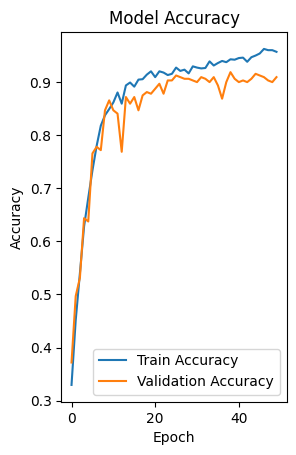

In [278]:
# Plot training & validation accuracy
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

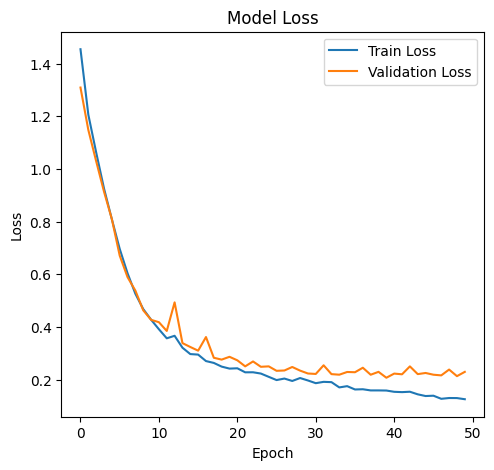

In [279]:
# Plot training & validation loss
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

In [280]:
# Confusion matrix and classification report

class_report = classification_report(y_true_classes, y_pred_classes)


print('\nClassification Report:')
print(class_report)

Confusion Matrix:
[[  0   0   0   0]
 [256 228 259 257]
 [  0   0   0   0]
 [  0   0   0   0]]

Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       1.00      0.23      0.37      1000
           2       0.00      0.00      0.00         0
           3       0.00      0.00      0.00         0

    accuracy                           0.23      1000
   macro avg       0.25      0.06      0.09      1000
weighted avg       1.00      0.23      0.37      1000



c:\Users\Lenovo\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Lenovo\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Lenovo\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.cap

In [285]:
test_df_to_predict = data.iloc[2000:]
test_df_to_predict

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,2,1,5,1,14,0,1,0.1,3,3,...,-1.406659,-1.131175,0.386784,12,7,2,0,1,0,NaN
1,1,1,2,1,4,1,4,0.8,3,5,...,0.604112,1.703656,0.462324,6,0,7,1,0,0,NaN
2,3,1,5,0,1,0,2,0.9,3,3,...,1.417509,1.077784,0.436530,17,10,10,0,1,1,NaN
3,3,0,2,1,18,1,2,0.5,1,8,...,1.310722,1.238854,0.589453,10,0,7,1,1,0,NaN
4,2,0,4,0,11,1,3,0.5,1,6,...,1.292546,-0.081919,-0.661569,15,8,7,1,0,1,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,1,5,0,0,1,4,0.5,3,7,...,1.467494,0.412795,1.377099,14,8,15,1,1,0,NaN
996,1,0,5,1,0,0,1,0.9,3,4,...,1.910545,1.112299,0.750667,8,1,19,0,1,1,NaN
997,2,0,4,0,1,1,1,0.5,1,1,...,-0.720497,-0.857356,-0.847656,5,0,14,1,0,0,NaN
998,3,1,2,1,0,0,4,0.4,3,2,...,1.319810,0.231016,0.573792,15,11,6,0,1,0,NaN


In [286]:
# Drop the target column 
if 'price_range' in test_df_to_predict.columns:
    test_df_to_predict = test_df_to_predict.drop(columns=['price_range'])

# Use the trained model to make predictions on the test data
test_predictions = model.predict(test_df_to_predict)

# Convert predictions to class labels
predicted_classes = test_predictions.argmax(axis=1)

# Add predictions to the test DataFrame
test_df_to_predict['predicted_price_range'] = predicted_classes

# Display the predictions
test_df_to_predict[['predicted_price_range']]

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


,predicted_price_range
0,2
1,2
2,3
3,3
4,1
...,...
995,3
996,2
997,0
998,3
